In [1]:
import sys
import argparse
import sys
import os
from colored import fg, bg, attr
C_GREEN = fg('green')
C_RED = fg('red')
C_BLUE = fg('blue')
C_DEFAULT = attr('reset')
#===============================================================
import linecache
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import MultipleLocator
import os,linecache
import sciPyFoam.polyMesh2d as mesh2d
import vtk
from vtk.util import numpy_support as VN

import proplot as pplot # there are some nice colormaps in the proplot package
mpl.rcParams['font.family'] = 'Helvetica'  #default font family
mpl.rcParams['mathtext.fontset'] = 'cm' #font for math

In [9]:
caseDir='cases/3D'
times,times_value=mesh2d.getTimes(caseDir)
timeName=times[-1]
patchName='heatsource'
cellZoneNames=[]
fieldNames=['T','phi','U']
patchData=mesh2d.getDataOnPatch_cellZones(caseDir,timeName,'seafloor',fieldNames=['phi','T','U'],cellZoneNames=['detachment','pipe'],calSf=False,triMesh=True)
phi=patchData['cellData']['phi'][:,0]
# print(phi[phi>0].sum(),phi[phi<0].sum())
# print(patchData['Sf'])

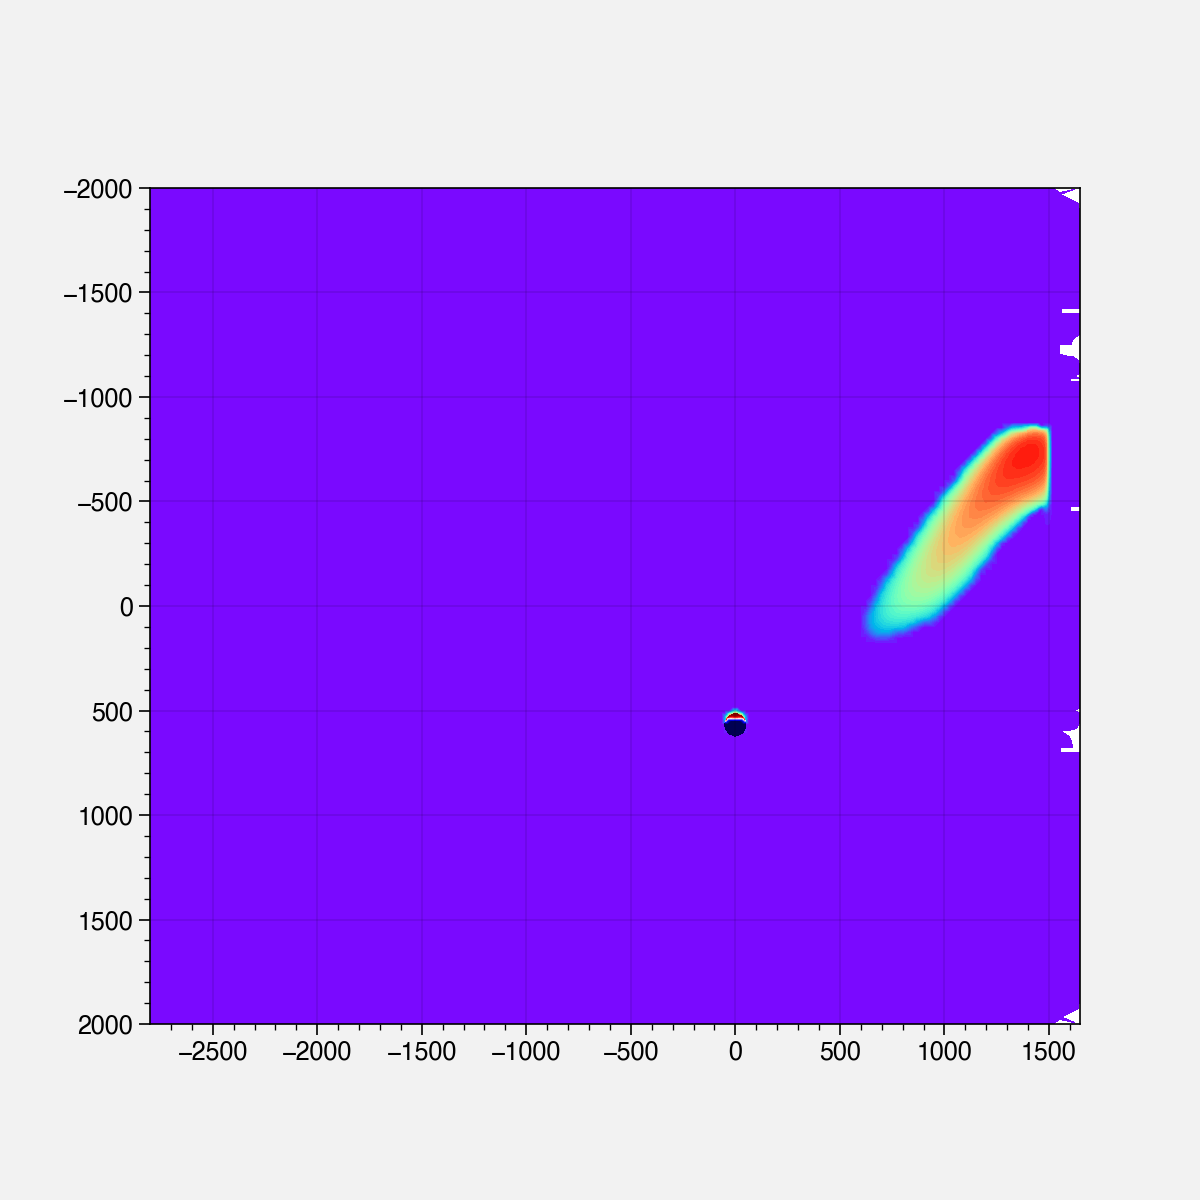

In [10]:
# plot mesh
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
x,y,z=patchData['x'],patchData['y'],patchData['z']
triangles=patchData['triData']['triangles']
cellData=patchData['triData']['cellData']
pointData=patchData['triData']['pointData']
# for polygon in patchData['polygons']:
#     ax.plot(np.append(x[polygon],x[polygon[0]]),np.append(z[polygon],z[polygon[0]]),lw=0.1,color='k')
# ax.triplot(x,z,triangles,lw=0.1,color='r',alpha=0.5)
# ax.tripcolor(x,z,triangles,cellData['phi'][:,0],cmap='rainbow')
# print(pointData['U'][0].max())
# magU=np.sqrt(pointData['U'][:,0]**2 + pointData['U'][:,1]**2 + pointData['U'][:,2]**2)
ax.tricontourf(x,z,triangles,pointData['T'],cmap='rainbow',levels=50)

# only plot pipe zone 
T_sf=patchData['cellData']['T']
cellZone_pipe=patchData['cellZones']['pipe']
polygons_pipe=patchData['polygons'][cellZone_pipe]
T_pipe=T_sf[cellZone_pipe]
triData_pipe=mesh2d.polyData2TriData(polygons_pipe,x,y,z,{'T':T_pipe})
ax.tricontourf(x,z,triData_pipe['triangles'],triData_pipe['pointData']['T'],cmap='seismic',levels=50)

ax.axis('scaled')
ax.invert_yaxis()
plt.savefig('test.pdf',bbox_inches='tight')

plt.show()

In [12]:
polygons=patchData['polygons']
polygons_pipe=polygons[patchData['cellZones']['pipe']]

In [51]:
boundaryEdgeConnection=[]
for polygon in polygons_pipe:
    for i in range(-1,len(polygon)-1):
        start='%d'%(polygon[i])
        end='%d'%(polygon[i+1])
        forwardConnect=start+'-'+end
        invertConnect=end+'-'+start
        if(forwardConnect in boundaryEdgeConnection):
            index_innerEdge=boundaryEdgeConnection.index(forwardConnect)
            boundaryEdgeConnection.pop(index_innerEdge)
        elif(invertConnect in boundaryEdgeConnection):
            index_innerEdge=boundaryEdgeConnection.index(invertConnect)
            boundaryEdgeConnection.pop(index_innerEdge)
        else:
            boundaryEdgeConnection.append(forwardConnect)
boundaryEdges=np.zeros((len(boundaryEdgeConnection),2),dtype=int)
for i in range(0,len(boundaryEdgeConnection)):
    connect=boundaryEdgeConnection[i]
    boundaryEdges[i,:]=np.array(connect.split('-'),dtype=int)

In [54]:
print(boundaryEdges.shape)

(34, 2)


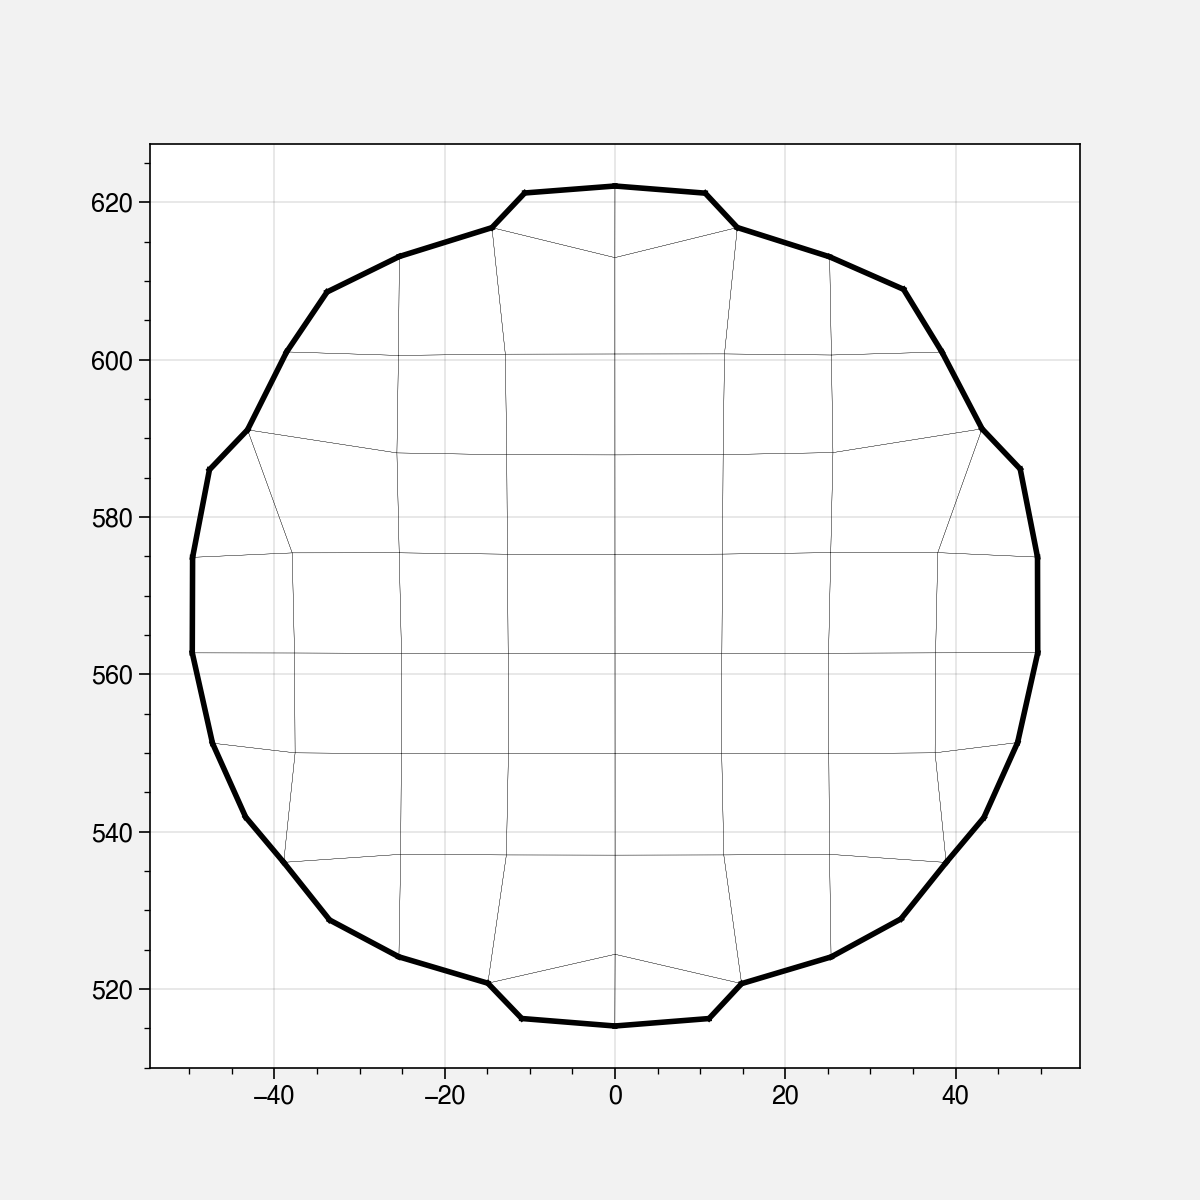

In [57]:
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
for polygon in polygons_pipe:
    ax.plot(np.append(x[polygon],x[polygon[0]]),np.append(z[polygon],z[polygon[0]]),lw=0.1,color='k')
for edge in boundaryEdges:
    ax.plot(x[edge],z[edge],lw=2,color='k')
plt.show()

In [58]:
print(len({}))

0
